
<h1 align=center><font size=5>Car prices - 3</font></h1>

<p>Dans cette section, nous développerons plusieurs modèles qui prédiront le prix de la voiture en utilisant les caractéristiques. Ceci n'est qu'une estimation mais ça devrait nous donner une idée objective du coût de la voiture.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Récupérer le jeu de données issu de l'analyse précédente

In [3]:
path="cars_final.csv"
df = pd.read_csv(path, index_col=0)
df.head()

,length,width,curb-weight,engine-size,horsepower,city-L/100km,highway-L/100km,wheel-base,bore,price,...,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,drive-wheels_fwd,drive-wheels_rwd
0,-0.439616,-0.855008,2548,130,111,11.190476,8.703704,88.6,3.47,16500.0,...,0,0,0,0,0,0,0,0,0,1
1,-0.245239,-0.189262,2823,152,154,12.368421,9.038462,94.5,2.68,16500.0,...,0,0,0,0,0,0,0,0,0,1
2,0.192109,0.143611,2337,109,102,9.791667,7.833333,99.8,3.19,13950.0,...,0,0,0,0,0,0,0,0,1,0
3,0.192109,0.238717,2824,136,115,13.055556,10.681818,99.4,3.19,17450.0,...,0,0,0,0,0,0,0,0,0,0
4,0.248803,0.191164,2507,136,110,12.368421,9.400000,99.8,3.19,15250.0,...,0,0,0,0,0,0,0,0,1,0


<h3>1. Régression linéaire univariée</h3>

<h4>Chargement du module</h4>

In [4]:
from sklearn.linear_model import LinearRegression

<h4>Instance de l'objet</h4>

In [5]:
lm = LinearRegression()
lm

LinearRegression()

<h4>Prédiction du prix à partir de la colonne highway-L/100km </h4>

In [51]:
X = df[['highway-L/100km']]
Y = df['price']

Entraînement du modèle :

In [50]:
lm.fit(X,Y)

LinearRegression()

Test de prédiction sur quelque lignes : 

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([15496.76826929, 16655.24161063, 12484.73758181, 22342.29255902,
       17906.39281928])

<h4>Valeur de l'intercept : b ?</h4>

In [9]:
lm.intercept_

-14623.538605502394

<h4>Valeur de la pente : a ?</h4>

In [10]:
lm.coef_

array([3460.63100264])

<h3>Modèle d'estimation obtenu :</h3>

$$
Yhat = a + b  X
$$

<b>price</b> = 3458.685X - 14617.843 *<b>highway-L/100km</b>

 ### Visualisation

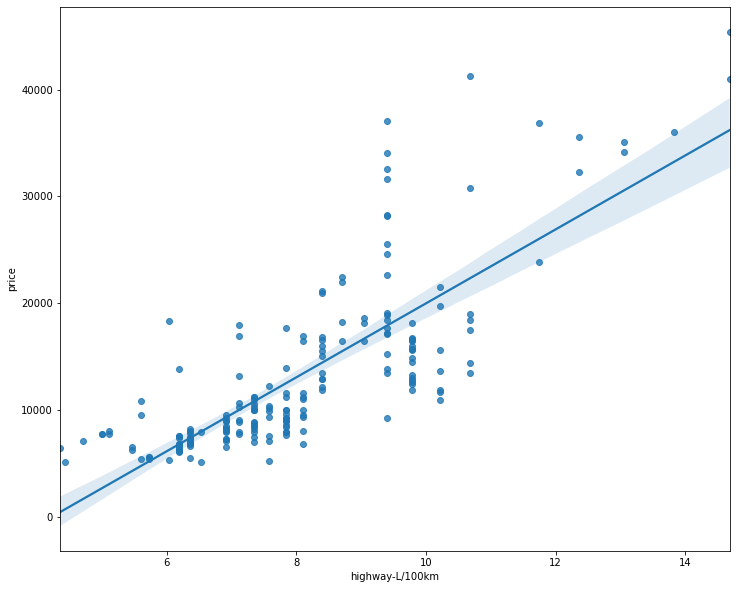

In [11]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-L/100km", y="price", data=df)

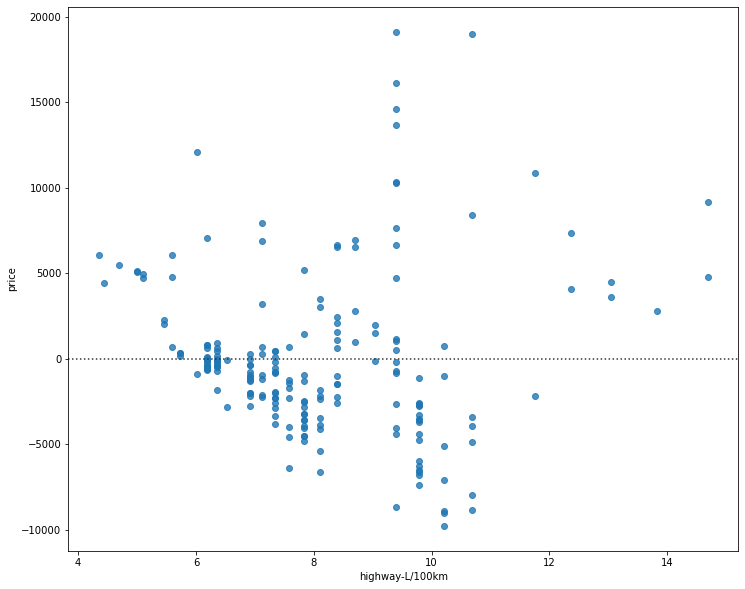

In [12]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-L/100km'], df['price'])
plt.show()

Le nuage de points n'est pas uniformément réparti autour de l'horizontale, ce qui semble indiquer une régression autre que linéaire.

## Régression linéaire multivariée

In [13]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
Z.head()

,horsepower,curb-weight,engine-size,highway-L/100km
0,111,2548,130,8.703704
1,154,2823,152,9.038462
2,102,2337,109,7.833333
3,115,2824,136,10.681818
4,110,2507,136,9.400000


Entraînement du modèle.

In [15]:
lm.fit(Z, df['price'])

LinearRegression()

Valeur de l'intercept a0 ?

In [16]:
lm.intercept_

-14383.748929849831

Valeurs des coefficients ?

In [17]:
lm.coef_

array([ 36.62425112,   3.4945574 ,  85.37910132, 502.57298307])

Modèle obtenu : 

$$
Yhat = a_0 + a_1 X_1 + a_2 X_2 + a_3 X_3 + a_4 X_4
$$

<b>Price</b> = -56827.2228887837 + 36.6377371 x <b>horsepower</b> + 3.5008215 x <b>curb-weight</b> + 85.37370862 x <b>engine-size</b> + 500.51979785 x <b>highway-mpg</b>

<h3>Evaluation et Visualisation</h3>

In [18]:
Y_hat = lm.predict(Z)

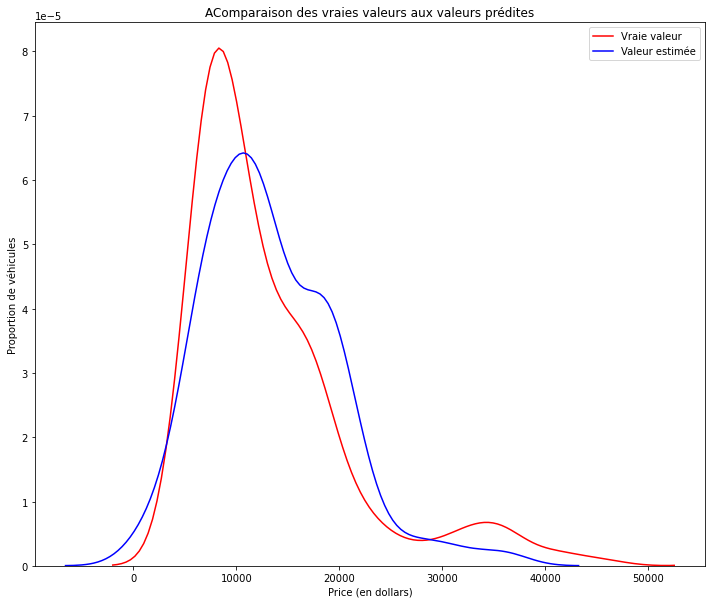

In [19]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Vraie valeur")
sns.distplot(Yhat, hist=False, color="b", label="Valeur estimée" , ax=ax1)


plt.title('AComparaison des vraies valeurs aux valeurs prédites')
plt.xlabel('Price (en dollars)')
plt.ylabel('Proportion de véhicules')

plt.show()
plt.close()

<p>C'est relativement proche. Mais une amélioration est possible.</p>

<h2>Régression Polynomiale et Pipelines</h2>

In [20]:
x = df['highway-L/100km']
x.max()

14.6875

In [52]:
def PlotPolly(model, x, y, Name):
    x_new = np.linspace(x.min(), x.max(), 100)
    y_new = model(x_new)

    plt.plot(x, y, '.', x_new, y_new, '-')
    plt.title('Modélisation polynomiale : Price ~ highway-L/100km')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price')

    plt.show()
    plt.close()

lets get the variables

In [22]:
x = df['highway-L/100km']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [24]:
# degré 3
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-23.38 x + 922.1 x - 7064 x + 2.145e+04


 Let's plot the function 

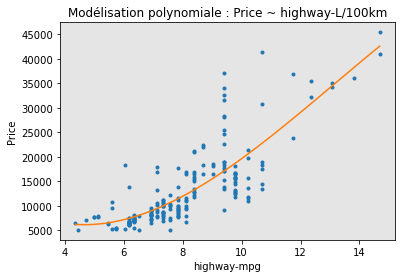

In [25]:
PlotPolly(p, x, y, 'highway-mpg')

In [26]:
np.polyfit(x, y, 3)

array([  -23.37611329,   922.12919775, -7063.83725212, 21445.20344533])

<p>C'est déja mieux qu'une droite !</p>

### Plus compliqué

Pour la régression multivariée la modélisation nécessite la création de pseudo-variables appelées PolynomialFeatures qui sont des produits croisés et des puissances des varaibles originales.

In [27]:
from sklearn.preprocessing import PolynomialFeatures

Degré 2: 

In [28]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [29]:
Z_pr=pr.fit_transform(Z)

Dimension des données :

In [30]:
Z.shape

(200, 4)

Après transformation :

In [31]:
Z_pr.shape

(200, 15)

<h2>Pipeline</h2>

<p>Une manière de somplifier le procédé :</p>

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Le pipeline est créé à partir d'une **liste** de **tuple** donnant dans l'ordre les opérations à effectuer.

In [34]:
Input=[('Reduction',StandardScaler()), ('polynomiale', PolynomialFeatures(include_bias=False)), ('Modele',LinearRegression())]

Le pipeline est instancié

In [35]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('Reduction', StandardScaler()),
                ('polynomiale', PolynomialFeatures(include_bias=False)),
                ('Modele', LinearRegression())])

On peut alors lancer les trois opérations : 

In [36]:
pipe.fit(Z,y)

Pipeline(steps=[('Reduction', StandardScaler()),
                ('polynomiale', PolynomialFeatures(include_bias=False)),
                ('Modele', LinearRegression())])

 On peut alors lancer la prédiction :

In [37]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([12372.48273904, 18414.55052179,  9964.23368315, 17532.62591913])

<h2>Mesures</h2>

<h3>Régression linéaire simple</h3>

Calcul de R^2

In [38]:
#highway_L/100km
lm.fit(X, Y)
#  R^2
print('Le R-square est: ', lm.score(X, Y))

Le R-square est:  0.6421025471527544


On peut dire que  ~ 64.179% de la variation du prix est expliqué par cette caractéristique.

Calcul de la MSE

In [39]:
Yhat=lm.predict(X)

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
mse = mean_squared_error(df['price'], Yhat)
print('MSE : ', mse)

MSE :  22603173.623282973


<h3>Régression linéaire multiple</h3>

Calcul de R^2

In [42]:
# modèlisation
lm.fit(Z, df['price'])
# R^2
print('Le R-square est: ', lm.score(Z, df['price']))

Le R-square est:  0.8118353385939377


 ~ 80.896 % ode la variation du prix est expliqué par ce modèle "multi_fit".

Calcul de la MSE

In [43]:
Y_predict_multifit = lm.predict(Z)

In [44]:
print('MSE : ', \
      mean_squared_error(df['price'], Y_predict_multifit))

MSE :  11883623.305200646


<h3>Modèle polynomial</h3>

Calcul de R^2

La méthode est légèrement différente : 

In [45]:
from sklearn.metrics import r2_score

In [46]:
r_2 = r2_score(y, p(x))
print('Le R-square est: ', r_2)

Le R-square est:  0.6754211963161393


~ 67.419 % de la variation du prix sera expliquée par ce modèle.

<h3>MSE</h3>

In [47]:
mean_squared_error(df['price'], p(x))

20498919.441136908

<h2>Conclusion</h2>
Le modèle ayant le R-squared le plus élevé et la plus basse MSE est le meilleur pour ce jeu de données.

<h3>And the winner is : </h3>

In [48]:
.....

SyntaxError: invalid syntax (<ipython-input-48-bad961a9d475>, line 1)

<hr>
Copyright &copy; 2020 Hatem & Driss @NEEDEMAND